In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import requests
import tarfile
import json

import os.path

In [2]:
# Downloading the dataset

fname = 'airline_2m.tar.gz'
fpath = f'dataset/{fname}'

if not os.path.exists(fpath):
    print(f'Downloading {fname}....')
    url = 'https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/' + fname
    r = requests.get(url)
    open(fpath , 'wb').write(r.content)

In [3]:
# Extracting the dataset
data_path = 'dataset/airline_2m.csv'
if not os.path.exists(data_path):
    print(f'Extracting .tgz to {data_path}.....')
    with tarfile.open(fpath) as tar:
        tar.extractall(path='dataset', filter='fully_trusted')

    

In [4]:
df = pd.read_csv(data_path, encoding = "ISO-8859-1", low_memory=False)

In [5]:
columns_to_drop = [
    'DayOfWeek',
    'IATA_CODE_Reporting_Airline',
    'Tail_Number',
    'OriginAirportSeqID',
    'OriginWac',
    'OriginStateFips',
    'Flight_Number_Reporting_Airline',
    'DestAirportSeqID',
    'DestStateFips',
    'DestWac',
    'DepDelay',
    'DepDel15',
    'DepartureDelayGroups',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'ArrDelay',
    'ArrDel15',
    'ArrivalDelayGroups',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Flights',
    'FirstDepTime',
    'TotalAddGTime',
    'LongestAddGTime',
    'DivAirportLandings',
    'Div1AirportSeqID',
    'Div1WheelsOn',
    'Div1TotalGTime',
    'Div1LongestGTime',
    'Div1WheelsOff',
    'Div1TailNum',
    'Div2Airport',
    'Div2AirportID',
    'Div2AirportSeqID',
    'Div2WheelsOn',
    'Div2TotalGTime',
    'Div2LongestGTime',
    'Div2WheelsOff',
    'Div2TailNum',
    'Div3Airport',
    'Div3AirportID',
    'Div3AirportSeqID',
    'Div3WheelsOn',
    'Div3TotalGTime',
    'Div3LongestGTime',
    'Div3WheelsOff',
    'Div3TailNum',
    'Div4Airport',
    'Div4AirportID',
    'Div4AirportSeqID',
    'Div4WheelsOn',
    'Div4TotalGTime',
    'Div4LongestGTime',
    'Div4WheelsOff',
    'Div4TailNum',
    'Div5Airport',
    'Div5AirportID',
    'Div5AirportSeqID',
    'Div5WheelsOn',
    'Div5TotalGTime',
    'Div5LongestGTime',
    'Div5WheelsOff',
    'Div5TailNum'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [6]:
#keeping only 1999 to 2019
df = df[(df['Year'] >= 1999) & (df['Year'] <= 2019)]

#first preliminary cleanup
df.to_csv('dataset/flight_clean1.zip', index=False, compression={'method': 'zip', 'archive_name': 'flight_clean1.csv'})

In [7]:
df.dtypes

Year                          int64
Quarter                       int64
Month                         int64
DayofMonth                    int64
FlightDate                   object
Reporting_Airline            object
DOT_ID_Reporting_Airline      int64
OriginAirportID               int64
OriginCityMarketID            int64
Origin                       object
OriginCityName               object
OriginState                  object
OriginStateName              object
DestAirportID                 int64
DestCityMarketID              int64
Dest                         object
DestCityName                 object
DestState                    object
DestStateName                object
CRSDepTime                    int64
DepTime                     float64
DepDelayMinutes             float64
DepTimeBlk                   object
CRSArrTime                    int64
ArrTime                     float64
ArrDelayMinutes             float64
ArrTimeBlk                   object
Cancelled                   

In [8]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'OriginAirportID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateName', 'DestAirportID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepTimeBlk', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrTimeBlk', 'Cancelled', 'CancellationCode',
       'Diverted', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivReachedDest',
       'DivActualElapsedTime', 'DivArrDelay', 'DivDistance', 'Div1Airport',
       'Div1AirportID'],
      dtype='object')

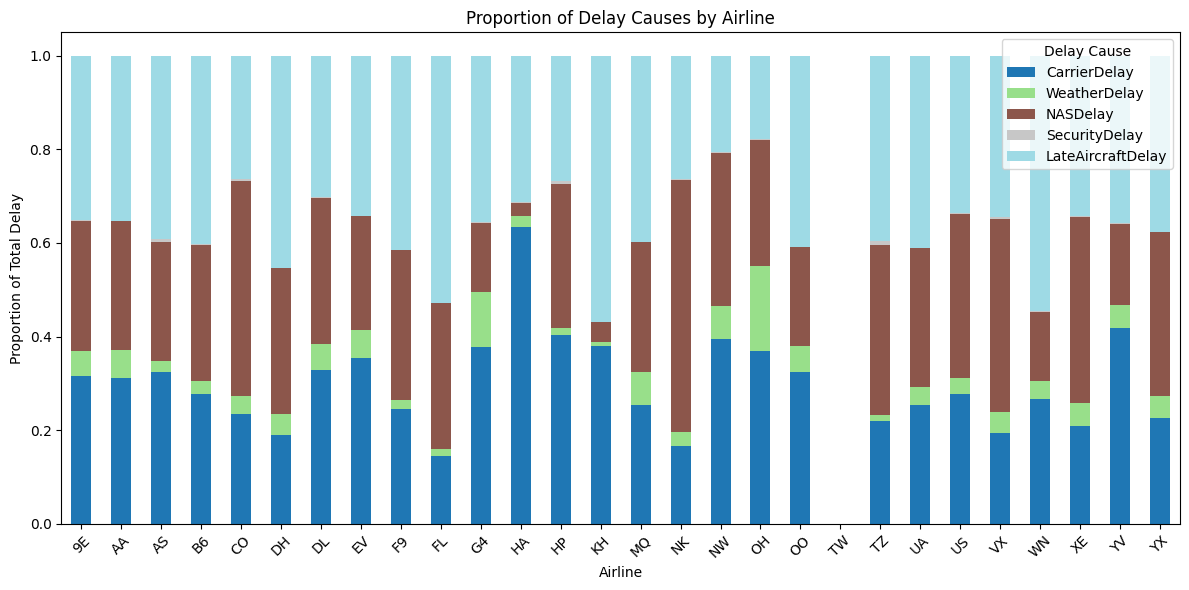

In [9]:
delay_by_airline = df.groupby('Reporting_Airline')[
    ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
].sum()

delay_by_airline_pct = delay_by_airline.div(delay_by_airline.sum(axis=1), axis=0)

delay_by_airline_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Proportion of Delay Causes by Airline')
plt.xlabel('Airline')
plt.ylabel('Proportion of Total Delay')
plt.legend(loc='upper right', title='Delay Cause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df['Reporting_Airline'].value_counts()

Reporting_Airline
WN    242451
DL    161823
AA    150367
UA    116345
OO    104951
US     83191
MQ     77298
EV     67243
NW     52691
CO     41420
B6     36909
AS     35887
XE     35645
FL     25954
OH     24032
YV     22025
9E     18946
HP     14615
F9     13964
HA     11482
NK      8091
TW      7933
DH      7165
YX      6682
VX      3994
TZ      2163
G4      2034
KH      1576
Name: count, dtype: int64

In [11]:
airline_mapping = {
    'WN': 'Southwest Airlines',
    'DL': 'Delta Air Lines',
    'AA': 'American Airlines',
    'UA': 'United Airlines',
    'OO': 'SkyWest Airlines',
    'US': 'US Airways',
    'MQ': 'Envoy Air',
    'EV': 'Republic Airways',
    'NW': 'Northwest Airlines',
    'CO': 'Continental Airlines',
    'B6': 'JetBlue Airways',
    'AS': 'Alaska Airlines',
    'XE': 'Sun Country Airlines',
    'FL': 'AirTran Airways',
    'OH': 'PSA Airlines',
    'YV': 'Mesa Air Group',
    '9E': 'Envoy Air',
    'HP': 'America West Airlines',
    'F9': 'Frontier Airlines',
    'HA': 'Hawaiian Airlines',
    'NK': 'Spirit Airlines',
    'TW': 'Trans World Airlines',
    'DH': 'Horizon Air',
    'YX': 'Air Wisconsin',
    'VX': 'Virgin America',
    'TZ': 'ATA Airlines',
    'G4': 'Allegiant Air',
    'KH': 'Kalitta Air'
}


In [12]:
df['AirlineName'] = df['Reporting_Airline'].map(airline_mapping)



In [13]:
df.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,OriginAirportID,OriginCityMarketID,Origin,...,NASDelay,SecurityDelay,LateAircraftDelay,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,AirlineName
1,2009,2,5,28,2009-05-28,FL,20437,13342,33342,MKE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AirTran Airways
2,2013,2,6,29,2013-06-29,MQ,20398,11921,31921,GJT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Envoy Air
3,2010,3,8,31,2010-08-31,DL,19790,12892,32575,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines
4,2006,1,1,15,2006-01-15,US,20355,11618,31703,EWR,...,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways
6,2006,3,8,7,2006-08-07,CO,19704,10721,30721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continental Airlines


In [14]:
airport_coordinates = {
    'LAX': {'lat': 33.9416, 'lon': -118.4085},  # Los Angeles International (Southwest, American, Delta, etc.)
    'ATL': {'lat': 33.6407, 'lon': -84.4279},  # Hartsfield–Jackson Atlanta International (Delta)
    'ORD': {'lat': 41.9742, 'lon': -87.9073},  # O'Hare International (United, American, etc.)
    'DFW': {'lat': 32.8998, 'lon': -97.0403},  # Dallas/Fort Worth International (American)
    'JFK': {'lat': 40.6413, 'lon': -73.7781},  # John F. Kennedy International (JetBlue, American)
    'SFO': {'lat': 37.7749, 'lon': -122.4194},  # San Francisco International (United, Alaska, etc.)
    'SEA': {'lat': 47.4502, 'lon': -122.3088},  # Seattle–Tacoma International (Alaska, Delta)
    'MIA': {'lat': 25.7957, 'lon': -80.2870},  # Miami International (American, Spirit)
    'BOS': {'lat': 42.3656, 'lon': -71.0096},  # Logan International (JetBlue, Delta)
    'LGA': {'lat': 40.7769, 'lon': -73.8738},  # LaGuardia Airport (American, Delta, Spirit)
    'PHX': {'lat': 33.4342, 'lon': -112.0124},  # Phoenix Sky Harbor International (American, Southwest)
    'EWR': {'lat': 40.6895, 'lon': -74.1745},  # Newark Liberty International (United, Spirit)
    'SLC': {'lat': 40.7851, 'lon': -111.9790},  # Salt Lake City International (Delta)
    'DEN': {'lat': 39.7392, 'lon': -104.9903},  # Denver International (Southwest, United, Frontier)
    'LAS': {'lat': 36.0855, 'lon': -115.1702},  # McCarran International (Southwest, Spirit, Allegiant)
    'MSP': {'lat': 44.8848, 'lon': -93.2223},  # Minneapolis–Saint Paul International (Delta)
    'FLL': {'lat': 26.0726, 'lon': -80.1517},  # Fort Lauderdale–Hollywood International (JetBlue, Spirit)
    'CLT': {'lat': 35.2140, 'lon': -80.9431},  # Charlotte Douglas International (American)
}

airline_to_airport = {
    'WN': 'DAL',  # Southwest Airlines - Dallas Love Field
    'DL': 'ATL',  # Delta Air Lines - Hartsfield–Jackson Atlanta International
    'AA': 'DFW',  # American Airlines - Dallas/Fort Worth International
    'UA': 'ORD',  # United Airlines - O'Hare International
    'OO': 'SFO',  # SkyWest Airlines - San Francisco International
    'US': 'PHX',  # US Airways (now American) - Phoenix Sky Harbor
    'MQ': 'DFW',  # Envoy Air (formerly American Eagle) - Dallas/Fort Worth International
    'EV': 'ATL',  # Republic Airways - Hartsfield–Jackson Atlanta International
    'NW': 'DTW',  # Northwest Airlines (now part of Delta) - Detroit Metropolitan
    'CO': 'IAH',  # Continental Airlines (now part of United) - George Bush Intercontinental
    'B6': 'JFK',  # JetBlue Airways - John F. Kennedy International
    'AS': 'SEA',  # Alaska Airlines - Seattle–Tacoma International
    'XE': 'MSP',  # Sun Country Airlines - Minneapolis–Saint Paul International
    'FL': 'ATL',  # AirTran Airways (now part of Southwest) - Hartsfield–Jackson Atlanta
    'OH': 'CVG',  # PSA Airlines (formerly part of Delta) - Cincinnati/NKY
    'YV': 'PHX',  # Mesa Air Group - Phoenix Sky Harbor
    '9E': 'DFW',  # Envoy Air - Dallas/Fort Worth International
    'HP': 'PHX',  # America West Airlines (now merged with US Airways) - Phoenix Sky Harbor
    'F9': 'DEN',  # Frontier Airlines - Denver International
    'HA': 'HNL',  # Hawaiian Airlines - Daniel K. Inouye International
    'NK': 'MIA',  # Spirit Airlines - Miami International
    'TW': 'JFK',  # Trans World Airlines (now part of American Airlines) - John F. Kennedy
    'DH': 'PDX',  # Horizon Air - Portland International
    'YX': 'MKE',  # Air Wisconsin - Milwaukee Mitchell International
    'VX': 'SFO',  # Virgin America (now part of Alaska Airlines) - San Francisco International
    'TZ': 'ORD',  # ATA Airlines (defunct) - O'Hare International
    'G4': 'LAS',  # Allegiant Air - McCarran International
    'KH': 'DTW',  # Kalitta Air - Detroit Metropolitan
}


In [15]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'OriginAirportID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateName', 'DestAirportID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepTimeBlk', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrTimeBlk', 'Cancelled', 'CancellationCode',
       'Diverted', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivReachedDest',
       'DivActualElapsedTime', 'DivArrDelay', 'DivDistance', 'Div1Airport',
       'Div1AirportID', 'AirlineName'],
      dtype='object')

In [16]:
flight_times_df = pd.DataFrame({
    'DepAirportCode': df['Origin'],  # Departure airport code
    'DepTime': df['DepTime'],  # Actual departure time
    'DepDelayMinutes': df['DepDelayMinutes'],  # Departure delay
    'ArrAirportCode': df['Dest'],  # Arrival airport code
    'ArrTime': df['ArrTime'],  # Actual arrival time
    'ArrDelayMinutes': df['ArrDelayMinutes'],  # Arrival delay
    'AirlineName': df['AirlineName']  # Airline name (optional)
})

flight_times_df.head()

,DepAirportCode,DepTime,DepDelayMinutes,ArrAirportCode,ArrTime,ArrDelayMinutes,AirlineName
1,MKE,1202.0,0.0,MCO,1541.0,0.0,AirTran Airways
2,GJT,1644.0,14.0,DFW,1942.0,0.0,Envoy Air
3,LAX,1305.0,0.0,DTW,2015.0,0.0,Delta Air Lines
4,EWR,1911.0,51.0,CLT,2058.0,32.0,US Airways
6,BOS,1751.0,0.0,CLE,2002.0,2.0,Continental Airlines


In [17]:
def get_coords(airport_code):
    return airport_coordinates.get(airport_code, {'lat': None, 'lon': None})        # defaults to {'lat': None, 'lon': None} if airport_code doesn't exist in mapping



In [18]:
flight_times_df['DepAirportCode'].apply(lambda x: get_coords(x))

1                  {'lat': None, 'lon': None}
2                  {'lat': None, 'lon': None}
3          {'lat': 33.9416, 'lon': -118.4085}
4           {'lat': 40.6895, 'lon': -74.1745}
6           {'lat': 42.3656, 'lon': -71.0096}
                          ...                
1999995    {'lat': 36.0855, 'lon': -115.1702}
1999996     {'lat': 40.6895, 'lon': -74.1745}
1999997            {'lat': None, 'lon': None}
1999998            {'lat': None, 'lon': None}
1999999            {'lat': None, 'lon': None}
Name: DepAirportCode, Length: 1376877, dtype: object

In [19]:

if not os.path.exists('dataset/airports.csv'):
    print(f'Downloading OpenFlights airports database....')
    req = requests.get('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat')
    with open('dataset/airports.csv', 'w', encoding='utf_8') as f:
        f.write(','.join(['AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'TzDatabaseTimezone', 'Type', 'Source']) + '\n')
        f.write(req.text)



In [20]:
# Load the airports data
airports_df = pd.read_csv('dataset/airports.csv')

# Filter to only rows with valid IATA codes and drop duplicates
airports_df = airports_df[airports_df['IATA'].notnull() & (airports_df['IATA'] != '\\N')]
airports_df = airports_df.drop_duplicates(subset='IATA')

# Keep only relevant columns
airport_coords = airports_df[['IATA', 'Latitude', 'Longitude']]
airport_coords.columns = ['AirportCode', 'Lat', 'Lon']

# Merge origin coordinates
# Merge departure airport coordinates
flight_times_df = flight_times_df.merge(
    airport_coords,
    left_on='DepAirportCode',
    right_on='AirportCode',
    how='left'
).rename(columns={'Lat': 'DepLat', 'Lon': 'DepLon'}).drop(columns='AirportCode')

# Merge arrival airport coordinates
flight_times_df = flight_times_df.merge(
    airport_coords,
    left_on='ArrAirportCode',
    right_on='AirportCode',
    how='left'
).rename(columns={'Lat': 'ArrLat', 'Lon': 'ArrLon'}).drop(columns='AirportCode')

flight_times_df.to_csv('dataset/flight_times.csv', index=False)

In [21]:
import json

# Function to create a GeoJSON LineString for each flight
def make_feature(row):
    return {
        "type": "Feature",
        "properties": {
            "airline": row['AirlineName'],
            "dep_code": row['DepAirportCode'],
            "arr_code": row['ArrAirportCode'],
            "dep_time": row['DepTime'],
            "arr_time": row['ArrTime'],
            "dep_delay": row['DepDelayMinutes'],
            "arr_delay": row['ArrDelayMinutes']
        },
        "geometry": {
            "type": "LineString",
            "coordinates": [
                [row['DepLon'], row['DepLat']],
                [row['ArrLon'], row['ArrLat']]
            ]
        }
    }

# Filter out rows with missing coordinates (just in case)
filtered_df = flight_times_df.dropna(subset=['DepLat', 'DepLon', 'ArrLat', 'ArrLon'])

# Build the GeoJSON feature collection
geojson = {
    "type": "FeatureCollection",
    "features": [make_feature(row) for _, row in filtered_df.iterrows()]
}

# Write to file
if not os.path.exists('dataset/flights.geojson'):
    print('Converting flights to GeoJSON')
    with open('dataset/flights.geojson', 'w') as f:
        json.dump(geojson, f, indent=2)

    print("Successfully wrote flights.geojson")
    